# Results

After running several models Stacking Classifier with top 5 models provides the best prediction for the dataset and 
the results are shown below:

Best Mean Cross Validation Score is :86%
    
Best Mean Cross Validation Score is {'final_estimator__C': 2.1544346900318843, 'stack_method': 'auto'}

Test score is : 87%
    
Train score is :93%

## Choosing Metrics:

The dataset revolves around weather prediction, the main aim of the project is to predict whether it will rain tomorrow or not 
since I am predicting the probabality of of the classes, its necessary to take into account of both.Hence ROC_AUC is used as scoring method to give equal importance to TPR and FPR

# Importing and Analyzing Data

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling
from IPython.core.interactiveshell import InteractiveShell

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Importing and Analyzing Data
data = pd.read_csv("C:/Users/tharu/OneDrive/Desktop/MS-Sem 2/Applied Machine Learning/Coding Exam/Exam 2/weatherAUS.csv")


# Exploratory Data Analysis

In [4]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       NaN     16.9     21.8        No      0.0           No  
1       NaN     17.2     24.3        No      0.0           No  
2       2.0     21.0     23.2        No      0.0           No  
3       NaN     18.1     26.5        No      1.0           No  
4       8.0     17.8     29.7        No      0.2           No

In [5]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [7]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

In [8]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [9]:
# Splitting Data based on Data Types
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [68]:
# Separating Variables based on Data types

In [12]:
encoded_var=data[['Cloud9am', 'Cloud3pm']]

In [13]:
encoded_var

Cloud9am  Cloud3pm
0            8.0       NaN
1            NaN       NaN
2            NaN       2.0
3            NaN       NaN
4            7.0       8.0
...          ...       ...
142188       NaN       NaN
142189       NaN       NaN
142190       NaN       NaN
142191       NaN       NaN
142192       3.0       2.0

[142193 rows x 2 columns]

In [14]:
cat_d=[var for var in data.columns if data[var].dtype=='object' and var not in encoded_var]

In [15]:
cat_data=data[cat_d]

In [16]:
cat_data.head()

Location WindGustDir WindDir9am WindDir3pm  Year Month Dates
0   Albury           W          W        WNW  2008    12    01
1   Albury         WNW        NNW        WSW  2008    12    02
2   Albury         WSW          W        WSW  2008    12    03
3   Albury          NE         SE          E  2008    12    04
4   Albury           W        ENE         NW  2008    12    05

In [17]:
num_d=[var for var in data.columns if data[var].dtype!='object' and var not in encoded_var]
num_data=data[num_d]

In [18]:
num_data

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
142188      3.5     21.8       0.0          NaN       NaN           31.0   
142189      2.8     23.4       0.0          NaN       NaN           31.0   
142190      3.6     25.3       0.0          NaN       NaN           22.0   
142191      5.4     26.9       0.0          NaN       NaN           37.0   
142192      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
142188          15.0          13.0         59.0         27.0       1024.7   
142189          13.0          11.0         51.0         24.0       1024.6   
142190          13.0           9.0         56.0         21.0       1023.5   
142191           9.0           9.0         53.0         24.0       1021.0   
142192          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  
0            1007.1     16.9     21.8          0      0.0             0  
1            1007.8     17.2     24.3          0      0.0             0  
2            1008.7     21.0     23.2          0      0.0             0  
3            1012.8     18.1     26.5          0      1.0             0  
4            1006.0     17.8     29.7          0      0.2             0  
...             ...      ...      ...        ...      ...           ...  
142188       1021.2      9.4     20.9          0      0.0             0  
142189       1020.3     10.1     22.4          0      0.0             0  
142190       1019.1     10.9     24.5          0      0.0             0  
142191       1016.8     12.5     26.1          0      0.0             0  
142192       1016.5     15.1     26.0          0      0.0             0  

[142193 rows x 17 columns]

In [14]:
cat_data.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [23]:
for var in cat_data.columns:
    print("The unique values of {} are \n  --- {}".format(var, cat_data[var].unique()) )

The unique values of Date are 
  --- ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
The unique values of Location are 
  --- ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
The unique values of WindGustDir are 
  --- ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
The unique values of WindDir9am are 
  --- ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 

## Visualization

In [5]:
import pandas_profiling as pp
pp.ProfileReport(data)

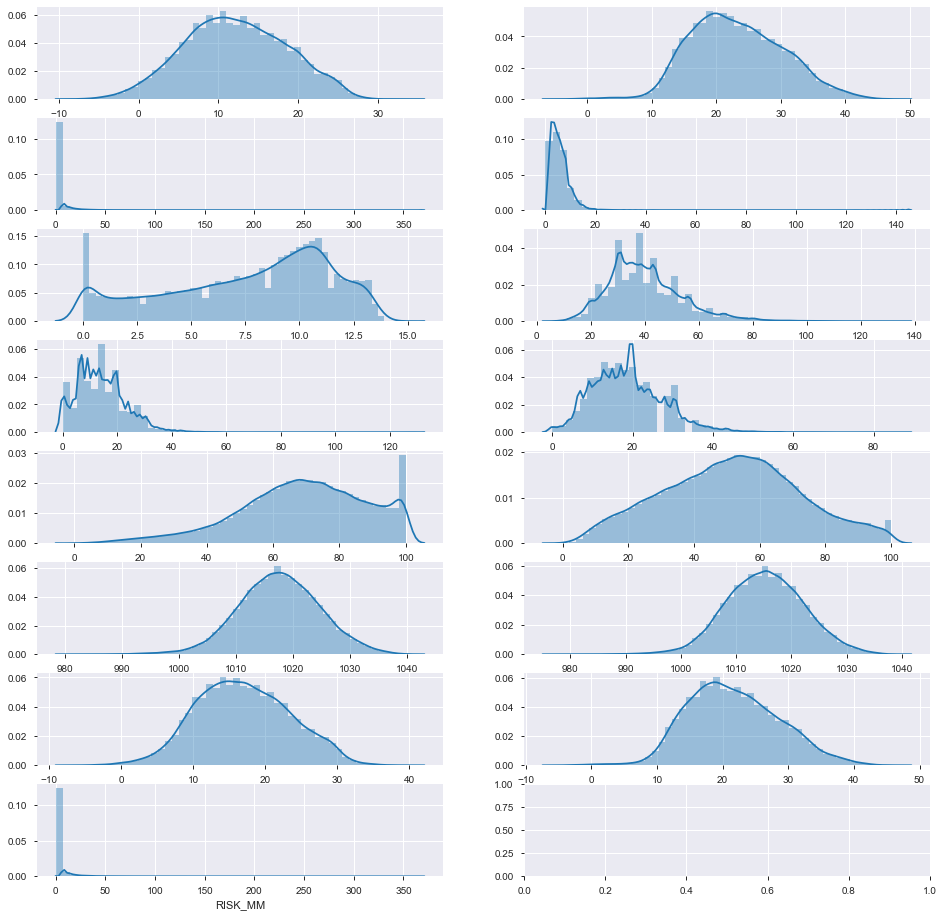

In [25]:
fig, axs = plt.subplots(ncols=2, nrows=8,figsize=(16,16))
axs = axs.flatten()

for i, var in enumerate(num_d):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

In [25]:
#Check for Correlation
data.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736267  0.104255     0.467261  0.072961   
MaxTemp        0.736267  1.000000 -0.074839     0.588915  0.469967   
Rainfall       0.104255 -0.074839  1.000000    -0.064549 -0.227525   
Evaporation    0.467261  0.588915 -0.064549     1.000000  0.366607   
Sunshine       0.072961  0.469967 -0.227525     0.366607  1.000000   
WindGustSpeed  0.177285  0.067690  0.133497     0.203001 -0.032831   
WindSpeed9am   0.176005  0.014680  0.086816     0.193936  0.008040   
WindSpeed3pm   0.175749  0.050800  0.057759     0.128895  0.056012   
Humidity9am   -0.234211 -0.505432  0.223725    -0.505890 -0.491603   
Humidity3pm    0.005999 -0.509270  0.255312    -0.392785 -0.629122   
Pressure9am   -0.451260 -0.332293 -0.168085    -0.269907  0.040959   
Pressure3pm   -0.461623 -0.427279 -0.126728    -0.293160 -0.020464   
Cloud9am       0.077625 -0.289865  0.198195    -0.185032 -0.675610   
Cloud3pm       0.020489 -0.279053  0.171993    -0.184287 -0.704202   
Temp9am        0.901813  0.887020  0.011477     0.545497  0.291139   
Temp3pm        0.708865  0.984562 -0.079178     0.574275  0.490180   
RISK_MM        0.124743 -0.044208  0.308557    -0.043498 -0.294973   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177285      0.176005      0.175749    -0.234211   
MaxTemp             0.067690      0.014680      0.050800    -0.505432   
Rainfall            0.133497      0.086816      0.057759     0.223725   
Evaporation         0.203001      0.193936      0.128895    -0.505890   
Sunshine           -0.032831      0.008040      0.056012    -0.491603   
WindGustSpeed       1.000000      0.604837      0.686419    -0.215461   
WindSpeed9am        0.604837      1.000000      0.519971    -0.270807   
WindSpeed3pm        0.686419      0.519971      1.000000    -0.145942   
Humidity9am        -0.215461     -0.270807     -0.145942     1.000000   
Humidity3pm        -0.026663     -0.031607      0.015903     0.667388   
Pressure9am        -0.457891     -0.227923     -0.295567     0.139519   
Pressure3pm        -0.412922     -0.174916     -0.254988     0.186955   
Cloud9am            0.071235      0.024280      0.052780     0.452182   
Cloud3pm            0.109088      0.053584      0.025269     0.358043   
Temp9am             0.150258      0.129298      0.163601    -0.472826   
Temp3pm             0.032970      0.005108      0.028567    -0.499777   
RISK_MM             0.162923      0.069404      0.049240     0.172417   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.005999    -0.451260    -0.461623  0.077625  0.020489   
MaxTemp          -0.509270    -0.332293    -0.427279 -0.289865 -0.279053   
Rainfall          0.255312    -0.168085    -0.126728  0.198195  0.171993   
Evaporation      -0.392785    -0.269907    -0.293160 -0.185032 -0.184287   
Sunshine         -0.629122     0.040959    -0.020464 -0.675610 -0.704202   
WindGustSpeed    -0.026663    -0.457891    -0.412922  0.071235  0.109088   
WindSpeed9am     -0.031607    -0.227923    -0.174916  0.024280  0.053584   
WindSpeed3pm      0.015903    -0.295567    -0.254988  0.052780  0.025269   
Humidity9am       0.667388     0.139519     0.186955  0.452182  0.358043   
Humidity3pm       1.000000    -0.027449     0.051840  0.517037  0.523270   
Pressure9am      -0.027449     1.000000     0.961348 -0.130081 -0.148139   
Pressure3pm       0.051840     0.961348     1.000000 -0.061152 -0.084963   
Cloud9am          0.517037    -0.130081    -0.061152  1.000000  0.604118   
Cloud3pm          0.523270    -0.148139    -0.084963  0.604118  1.000000   
Temp9am          -0.221467    -0.422773    -0.470325 -0.137843 -0.127869   
Temp3pm          -0.557989    -0.287301    -0.389863 -0.302520 -0.318254   
RISK_MM           0.313183    -0.163673    -0.164184  0.198095  0.234814   

                Temp9am   Temp3pm   RISK_MM  
MinTemp        0.901813  

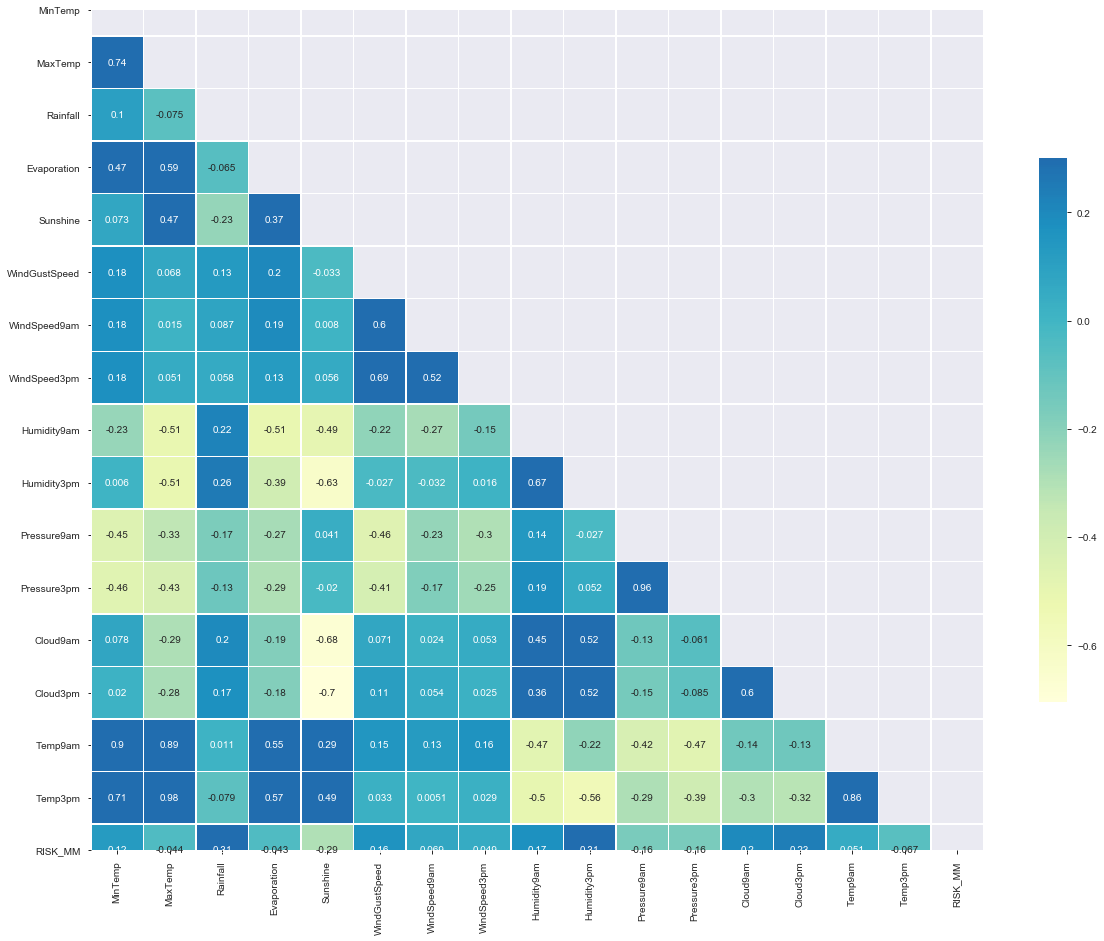

In [26]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(data.corr(),annot=True, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [27]:
#EDA
#Step-1 Handling Null
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [28]:
null_val=data.isnull().mean()
print("Null values in each Column- \n{} ".format(null_val*100))

Null values in each Column- 
Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64 


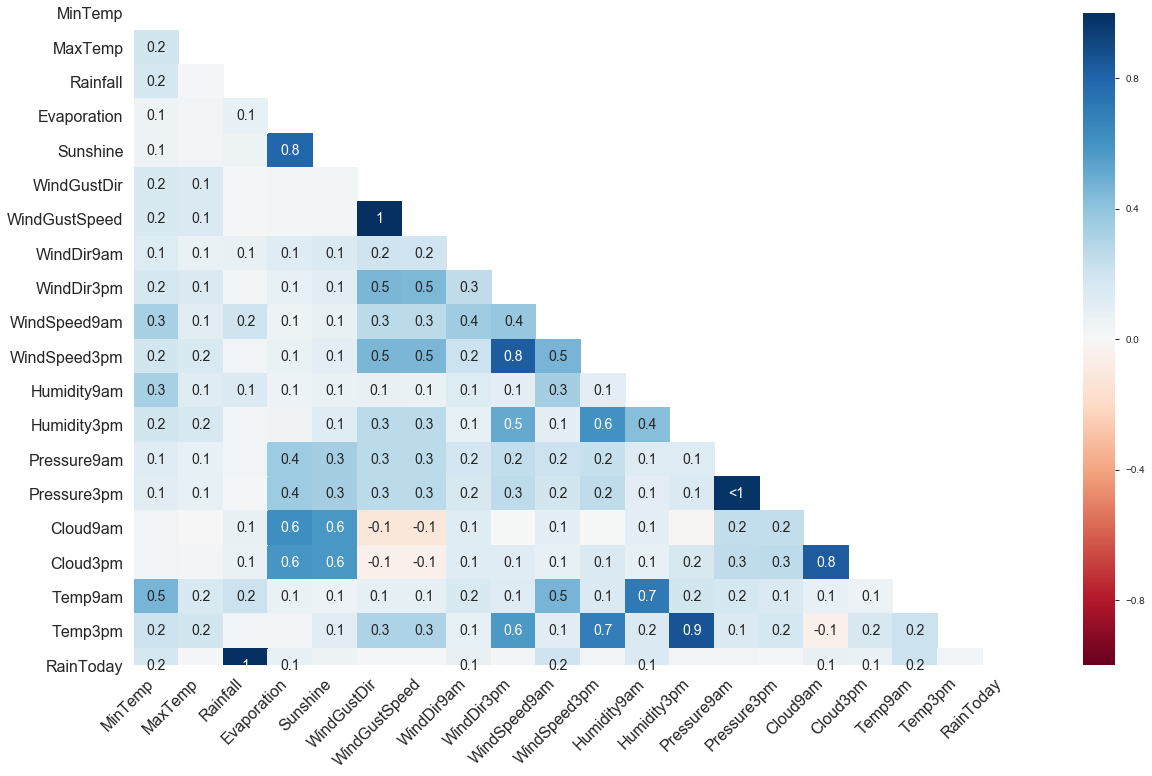

In [36]:
import missingno as msno
msno.heatmap(data)

In [48]:
data['RainTomorrow']

0         No
1         No
2         No
3         No
4         No
          ..
142188    No
142189    No
142190    No
142191    No
142192    No
Name: RainTomorrow, Length: 142193, dtype: object

In [5]:
data['RainTomorrow']=pd.get_dummies(data['RainTomorrow'],prefix='RainTomorrow',drop_first=True)

In [6]:
data['RainTomorrow']=data['RainTomorrow'].astype(int)

In [7]:
data['RainToday']=pd.get_dummies(data['RainToday'],prefix='RainToday',drop_first=True)

In [8]:
data['Year'] = data['Date'].str.split('-').str[0]

In [9]:
data['Month'] = data['Date'].str.split('-').str[1]
data['Dates'] = data['Date'].str.split('-').str[2]

In [10]:
data.drop('Date',axis=1,inplace=True)

In [19]:
null_val=num_data.isnull().mean()
print("Null values in each Column- \n{} ".format(null_val*100))

Null values in each Column- 
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustSpeed     6.519308
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.000000
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64 


In [20]:
categorical=[var for var in data.columns if var in encoded_var]

In [21]:
for i in encoded_var:
    data[i].fillna(method='ffill',inplace=True)

In [22]:
data['Cloud3pm'].replace(np.nan,0,inplace=True)

In [26]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       0.0   
1         44.0         25.0       1010.6       1007.8       8.0       0.0   
2         38.0         30.0       1007.6       1008.7       8.0       2.0   
3         45.0         16.0       1017.6       1012.8       8.0       2.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  Year Month Dates  
0     16.9     21.8          0      0.0             0  2008    12    01  
1     17.2     24.3          0      0.0             0  2008    12    02  
2     21.0     23.2          0      0.0             0  2008    12    03  
3     18.1     26.5          0      1.0             0  2008    12    04  
4     17.8     29.7          0      0.2             0  2008    12    05

In [108]:
num_d

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [23]:
numerical=[var for var in data.columns if data[var].dtype!='object']
mean_median_columns = [var for var in numerical if (data[var].isnull().mean()<0.5
                                                     and data[var].isnull().mean()>0 )]
mean_median_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [24]:
categorical=[var for var in data.columns if data[var].dtype=='object']
freq_columns = [var for var in categorical if (data[var].isnull().mean()<0.5
                                                     and data[var].isnull().mean()>0 )]
freq_columns

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [92]:
type(mean_median_columns)

list

<Figure size 720x432 with 0 Axes>

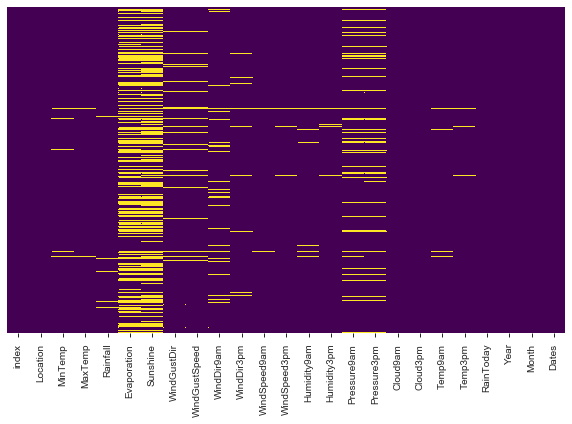

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(sample.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [111]:
sample=pd.DataFrame(X_train)

In [44]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Year', 'Month',
       'Dates'],
      dtype='object')

In [45]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          uint8
RISK_MM          float64
RainTomorrow     float64
Year              object
Month             object
Dates             object
dtype: object

Since there are 140K rows I have sampled the data for further analysis so that  the time taken for the models to converge  is comparitively reduced.

In order to not lose the imbalanced nature of the data, I have used stratified sampling to hold the true nature of the underlying dataset.

In [25]:
#Stratified Sampling 
def __smpl_size(population, size):
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

In [26]:
def stratified_sample(data, strata, size=0.4, seed=None, keep_index= True):
    population = len(data)
    size = __smpl_size(population, size)
    tmp = data[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int) 
    first = True 
    for i in range(len(tmp_grpd)):
            
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']
            if type(value) == str:
                value = "'" + str(value) + "'"

            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)

    
        if first:
            stratified_data = data.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = data.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_data = stratified_data.append(tmp_df, ignore_index=True)

    return stratified_data

In [27]:
new_data=stratified_sample(data, strata=['RainTomorrow'], size=0.05, seed=0, keep_index= True)

In [28]:
data['RainTomorrow'].value_counts(1)

0    0.775819
1    0.224181
Name: RainTomorrow, dtype: float64

In [29]:
new_data['RainTomorrow'].value_counts(1)

0    0.775809
1    0.224191
Name: RainTomorrow, dtype: float64

In [34]:
new_data

index          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      59653           Bendigo      4.8     20.1       0.0          NaN   
1     108833            Albany     17.0     22.7       0.0          NaN   
2      84742          Brisbane     22.1     32.1       0.4          8.2   
3      62762  MelbourneAirport     14.9     36.0       0.0          7.6   
4     102641         Nuriootpa      7.1     11.7       8.8          3.6   
...      ...               ...      ...      ...       ...          ...   
7105   97242      MountGambier      8.9     14.9       1.6          1.4   
7106   17274         Newcastle     15.4     22.3       8.0          NaN   
7107   81559          Dartmoor     14.7     23.8       0.0          NaN   
7108   58336           Bendigo      1.2     10.9       1.6          1.6   
7109   99025      MountGambier     15.8     22.2       0.0         13.4   

      Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0          NaN         SSE           31.0         SW         SW           9.0   
1          NaN         NaN            NaN         SW        NaN          13.0   
2          9.2          NE           22.0          S        ENE           4.0   
3         12.3           N           37.0        NNE        SSE           7.0   
4          5.3           W           72.0         SW          W           9.0   
...        ...         ...            ...        ...        ...           ...   
7105       6.1         WSW           54.0          W          W          30.0   
7106       NaN         NaN            NaN         SE        NaN           9.0   
7107       NaN         SSW           37.0        SSW         SW           7.0   
7108       NaN         WSW           41.0        WNW        WNW          13.0   
7109       3.5         NaN            NaN        WSW         SW          15.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             11.0         75.0         35.0       1021.9       1018.6   
1              NaN         83.0          NaN       1009.3       1007.5   
2             11.0         62.0         56.0       1015.5       1011.8   
3             26.0         71.0         22.0       1017.8       1014.0   
4             19.0         93.0         57.0       1014.3       1015.0   
...            ...          ...          ...          ...          ...   
7105          35.0         90.0         62.0       1007.0       1009.6   
7106           NaN         94.0          NaN          NaN          NaN   
7107          20.0         81.0         55.0       1010.9       1010.9   
7108          20.0         84.0         65.0       1018.2       1016.4   
7109          15.0         56.0         92.0       1014.2       1018.7   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  \
0          1.0       7.0     10.0     18.2          0      0.0             0   
1          1.0       8.0     20.0      NaN          0      0.0             0   
2          4.0       5.0     28.2     29.6          0      0.0             0   
3          1.0       1.0     19.1     34.2          0      0.0             0   
4          6.0       7.0      8.5     10.4          1      0.4             0   
...        ...       ...      ...      ...        ...      ...           ...   
7105       7.0       7.0     11.6     13.8          1     20.0             1   
7106       7.0       1.0     17.0      NaN          1      4.8             1   
7107       7.0       7.0     17.2     22.4          0      4.0             1   
7108       8.0       8.0      5.0     10.2          1      2.4             1   
7109       7.0       8.0     20.3     14.0          0      1.2             1   

      Year Month Dates  
0     2017    03    31  
1     2017    01    15  
2     2017    03    02  
3     2009    01    27  
4     2016    07    23  
...    ...   ...   ...  
7105  2009    09    23  
7106  2016    04    23  
7107  2017    02    11  
7108  2013    08    20  
7109  20

I have dropped 'RISK_MM' because its the amount of rainfall in mm it directly gives details/ predictions about the weather tomorrow so it leaks information for prediction.

In [30]:
X=new_data.drop(['RainTomorrow','RISK_MM'],axis=1)
y=new_data['RainTomorrow']
print(X.shape,' ', y.shape)


(7110, 25)   (7110,)


In [31]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((4977, 25), (4977,))

In [101]:
X_train.head()

index       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2345    9976   CoffsHarbour     16.1     23.7       0.0          6.6   
4837  141800          Uluru     12.1     29.6       0.0          NaN   
724    78225       Watsonia     14.3     35.3       0.0          6.0   
765   106534         Albany      8.2     20.7       0.0          2.2   
4776   21789  NorfolkIsland     17.4     22.5       6.8          3.4   

      Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2345      10.0           S           37.0        SSW        SSE          20.0   
4837       NaN          NW           28.0        NaN         NW           0.0   
724       10.7         SSW           31.0        NNE        SSE           4.0   
765        9.3         NaN            NaN         NW         SW           7.0   
4776       5.5           E           50.0        ESE        ESE          26.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2345          24.0         56.0         53.0       1021.4       1020.1   
4837           9.0         65.0         35.0       1015.2       1011.5   
724            9.0         79.0         20.0       1018.0       1012.9   
765            4.0         87.0         54.0       1025.2       1022.1   
4776          30.0         83.0         82.0       1023.2       1020.8   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year Month Dates  
2345       3.0       1.0     21.3     23.1          0  2011    12    17  
4837       6.0       1.0     17.8     29.0          0  2016    05    25  
724        5.0       4.0     16.7     33.1          0  2016    01    10  
765        3.0       2.0     11.0     18.8          0  2010    06    20  
4776       6.0       6.0     20.2     20.8          1  2012    04    17

In [102]:
X_train.dtypes

index              int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          uint8
Year              object
Month             object
Dates             object
dtype: object

In [32]:
from feature_engine import missing_data_imputers as mdi
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from feature_engine.variable_transformers import PowerTransformer
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine.outlier_removers import Winsorizer

In [33]:
weather_pipe = Pipeline([

    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='median',variables=mean_median_columns)),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=freq_columns)),
    

    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['WindGustDir', 'WindDir9am', 'WindDir3pm','Location'], # we can select which variables to encode
                               drop_last=True)),

     ('winsorizer', Winsorizer(distribution='skewed', tail='both',fold=5,variables=mean_median_columns))
     


])

In [34]:
weather_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_mean',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['MinTemp', 'MaxTemp', 'Rainfall',
                                              'Evaporation', 'Sunshine',
                                              'WindGustSpeed', 'WindSpeed9am',
                                              'WindSpeed3pm', 'Humidity9am',
                                              'Humidity3pm', 'Pressure9am',
                                              'Pressure3pm', 'Temp9am',
                                              'Temp3pm'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['WindGustD...
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['WindGustDir',
                                                     'WindDir9am', 'WindDir3pm',
                              

In [35]:
X_train=weather_pipe.transform(X_train)
X_test=weather_pipe.transform(X_test)

In [116]:
sample=pd.DataFrame(X_train,columns=X_train.columns)

<Figure size 720x432 with 0 Axes>

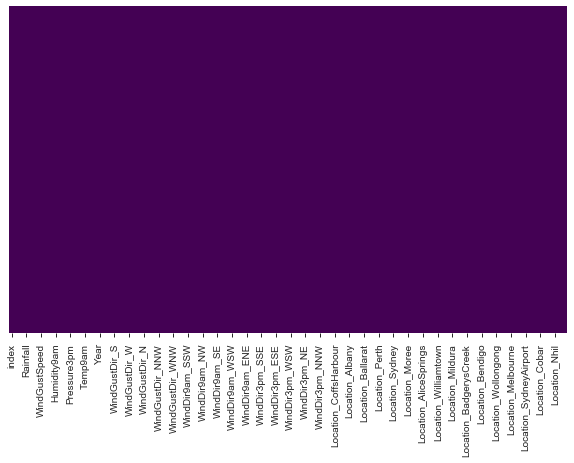

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(sample.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Figure size 720x432 with 0 Axes>

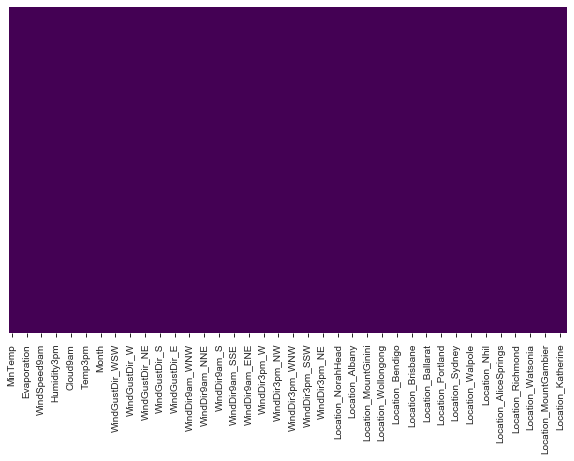

In [176]:
sample_test=pd.DataFrame(X_test,columns=X_test.columns)
plt.figure(figsize=(10,6))
sns.heatmap(sample_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Naive Algorithms

## Dummy Classifier

In [45]:
# Naive Algorithm 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [47]:
model_naive = DummyClassifier(strategy='stratified',random_state=123)
model_naive.fit(X_train,y_train)
cv_scores = cross_val_score(model_naive, X_train, y_train,scoring='roc_auc')

print("Mean Cross-validation scores: {}".format(cv_scores.mean()))

print("Naive Algorithm's Test Performance: ", model_naive.score(X_test,y_test))

DummyClassifier(constant=None, random_state=123, strategy='stratified')

Mean Cross-validation scores: 0.5060282572787991
Naive Algorithm's Test Performance:  0.6516643225503985


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
c=np.logspace(-3,2,10)


param_grid = {'C': c,'solver':['liblinear']}

logreg=LogisticRegression()

grid_logit = GridSearchCV(logreg, param_grid, cv=5,scoring='roc_auc')
grid_logit.fit(X_train,y_train)

print("Logistic Regression Parameters: {}".format( grid_logit.best_params_)) 
print("Best Mean Cross Validation score is {}".format(grid_logit.best_score_))
print("Best estimator is {}".format(grid_logit.best_estimator_))


print("Logistic Test Performance: ", grid_logit.score(X_test,y_test))
print("Logistic Train Performance: ", grid_logit.score(X_train,y_train ))


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

Logistic Regression Parameters: {'C': 0.5994842503189409, 'solver': 'liblinear'}
Best Mean Cross Validation score is 0.8564897240095007
Best estimator is LogisticRegression(C=0.5994842503189409, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logistic Test Performance:  0.8576833179460962
Logistic Train Performance:  0.8605219174784252


In [35]:
from sklearn.metrics import roc_auc_score

y_pred1 = grid_logit.predict_proba(X_test)[:, 1]
ROC_AUC1 = roc_auc_score(y_test, y_pred1)

print('ROC AUC-1 : {:.4f}'.format(ROC_AUC1))

ROC AUC-1 : 0.8577


## KNeighbors Classifier

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

param_knn = {'n_neighbors': range(1,5)}

grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring='roc_auc')
grid_knn.fit(X_train, y_train)

print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

print('KNN parameters: ', grid_knn.best_params_)

print("KNN Test Performance: ", grid_knn.score(X_test,y_test))
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 5)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

Best Mean Cross-validation score: 0.70

KNN parameters:  {'n_neighbors': 4}
KNN Test Performance:  0.7171698674662943
KNN Train Performance:  0.9062384254972407


## Decision Tree Classifier

In [44]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

param_dtree = {'max_depth': range(1,20),'criterion':['gini','entropy'],'splitter':['random']}


grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True,scoring='roc_auc')
grid_dtree.fit(X_train, y_train)

print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()


print('Decision Tree parameters: ', grid_dtree.best_params_)


print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20), 'splitter': ['ra

Best Mean Cross-validation score: 0.80

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
Decision Tree Test Performance:  0.773768194453982
Decision Tree Train Performance:  0.8219031260417052


## SVC using RBF Kernel

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid = [{'kernel': ['rbf'],
               'C': np.logspace(-3,3,5),
               'gamma': np.logspace(-3,3,5)}]
grid_svc_r = GridSearchCV(svc, param_grid, cv=3,
                          return_train_score=True,scoring='roc_auc')
grid_svc_r.fit(X_train, y_train)
print('train score: ', grid_svc_r.score(X_train, y_train))
print('test score: ', grid_svc_r.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_r.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_svc_r.best_score_))

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                          'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

train score:  0.876297038779214
test score:  0.8605636561092418
Best parameters: {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.85414


## SVC using Sigmoid Kernel

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid = [{'kernel': ['sigmoid'],
               'C': np.logspace(-3,3,5),
               'gamma': np.logspace(-3,3,5)}]
grid_svc = GridSearchCV(svc, param_grid, cv=3,
                          return_train_score=True,scoring='roc_auc')
grid_svc.fit(X_train, y_train)
print('train score: ', grid_svc.score(X_train, y_train))
print('test score: ', grid_svc.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_svc.best_score_))
              

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                          'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

train score:  0.8720343809029963
test score:  0.8594852778477198
Best parameters: {'C': 31.622776601683793, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best cross-validation score: 0.85117


## SVC using Poly Kernel

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid = [{'kernel': ['poly'],
               'degree':[1,2] }]
grid_svc_p = GridSearchCV(svc, param_grid, cv=3,
                          return_train_score=True,scoring='roc_auc')
grid_svc_p.fit(X_train, y_train)
print('train score: ', grid_svc_p.score(X_train, y_train))
print('test score: ', grid_svc_p.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_p.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_svc_p.best_score_))

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'degree': [1, 2], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

train score:  0.8743316882106744
test score:  0.8587947596920519
Best parameters: {'degree': 1, 'kernel': 'poly'}
Best cross-validation score: 0.85554


## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [500],
    'max_features': ['auto'],
    'max_depth' : [7,8,10],
    'criterion' :['entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring='roc_auc' )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [49]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Parameters are {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8523720839921622
Best Parameters are {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9688476888032891
Test score is 0.8600409987206975


## Extra Tree Classifier

In [54]:
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [10,11,12],
    'criterion' :['gini']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring='roc_auc' )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [55]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Parameters are {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8422611322280369
Best Parameters are {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.9588544946109115
Test score is 0.845297228008332


##  AdaBoostClassifier 

In [56]:
from sklearn.ensemble import AdaBoostClassifier
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini"],
              'base_estimator__splitter' :   ["best"],
              'base_estimator__max_depth' : [5,7,9],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True,scoring='roc_auc' )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [57]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Parameters are {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.843716541033159
Parameters are {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 9, 'base_estimator__splitter': 'best', 'learning_rate': 1.0, 'n_estimators': 150}
Train score is 1.0
Test score is 0.8458109836895287


## Gradient Boosting Classifier

In [58]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring='roc_auc' )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [59]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Parameters are {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.848389679403545
Best Parameters are {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9338852827882514
Test score is 0.854457084868878


In [ ]:
pip install xgboost

## XG BOOST

In [60]:
from  xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic',scoring='roc_auc')
xgbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.2,0.5],
               'min_child_weight' : [3,4,5],
                'subsample':[0.6,0.7,0.8]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     scoring='roc_auc', subsample=None,
                                     tree_method=None,
                                     validate_parameters=False,
               

In [61]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Parameters are {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8444889104155313
Best Parameters are {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 50, 'subsample': 0.7}
Train score is 0.8671890697207153
Test score is 0.8481012658227848


In [93]:
 classifiers={'knn':grid_knn,
              'logreg':grid_logit,
              'lsvc':lsvc_grid,
              'Ssvc':grid_svc,
              'Rsvc':grid_svc_r,
              'Psvc':grid_svc_p,
             'dtree':grid_dtree,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [94]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [95]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [96]:
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

model      mean       std
1      logreg  0.857242  0.010616
5        Psvc  0.855545  0.005572
4        Rsvc  0.854145  0.004870
7         rfc  0.852372  0.009380
3        Ssvc  0.851168  0.006471
10        gbc  0.848390  0.006755
11       xgbc  0.844489  0.009531
9   adc_dtree  0.843717  0.004827
8         etc  0.842261  0.009178
2        lsvc  0.833436  0.006263
6       dtree  0.798940  0.012954
0         knn  0.696077  0.020415

In [97]:
predictions_all = {}
for  key, value in classifiers.items():
    best_model = value.best_estimator_
    
    predictions = best_model.predict(X_test)
    
    predictions_all[key] = predictions

In [98]:
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

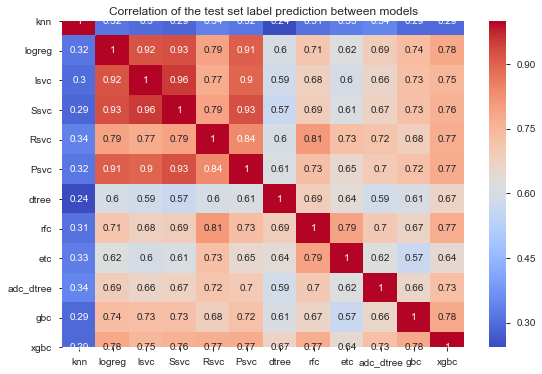

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [100]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [101]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Top Absolute Correlations
knn  dtree    0.242411
     Ssvc     0.287034
     gbc      0.292955
     xgbc     0.293680
     lsvc     0.301195
dtype: float64


## Stacking Classifier

In [49]:
#Top 5 estimators
estimators_ = [('logreg',grid_logit.best_estimator_),
            ('rsvc',grid_svc_r.best_estimator_),('psvc',grid_svc_p.best_estimator_),
            ('ssvc',grid_svc.best_estimator_),('rfc',rfc_grid.best_estimator_)]

In [50]:
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators=estimators_
                                , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : np.logspace(-3,2,10),
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('logreg',
                                                       LogisticRegression(C=0.046415888336127795,
                                                                          class_weight=None,
                                                                          dual=False,
                                                                          fit_intercept=True,
                                                                          intercept_scaling=1,
                                                                          l1_ratio=None,
                                                                          max_iter=100,
                                                                          multi_class='auto',
                                                                          n_jobs=None,
                        

In [52]:
print('Best Mean Cross Validation Score is :{:.2f}'.format (sclf1_grid.best_score_))
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print('Test score is : {:.2f}'.format(sclf1_grid.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(sclf1_grid.score(X_train,y_train)))

Best Mean Cross Validation Score is :0.86
Best Mean Cross Validation Score is {'final_estimator__C': 2.1544346900318843, 'stack_method': 'auto'}
Test score is : 0.87
Train score is : 0.93


In [45]:
#Top 3 estimators
estimators_ = [('logreg',grid_logit.best_estimator_),
            ('rsvc',grid_svc_r.best_estimator_),('psvc',grid_svc_p.best_estimator_)]

In [46]:
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators=estimators_
                                , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : np.logspace(-3,2,10),
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('logreg',
                                                       LogisticRegression(C=0.046415888336127795,
                                                                          class_weight=None,
                                                                          dual=False,
                                                                          fit_intercept=True,
                                                                          intercept_scaling=1,
                                                                          l1_ratio=None,
                                                                          max_iter=100,
                                                                          multi_class='auto',
                                                                          n_jobs=None,
                        

In [48]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print('Test score is : {:.2f}'.format(sclf1_grid.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(sclf1_grid.score(X_train,y_train)))

Best Mean Cross Validation Score is 0.8561257345522026
Best Mean Cross Validation Score is {'final_estimator__C': 27.825594022071257, 'stack_method': 'auto'}
Test score is : 0.86
Train score is : 0.88


# Cost Sensitive Learning Algorithms

In [42]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

## Logistic Regression

In [63]:
logreg = LogisticRegression(solver='lbfgs')
c=np.logspace(-3,2,10)
param_grid = {
    'C': c,
    'class_weight': [ {0:10,1:1}, {0:1,1:1}, {0:1,1:10}],
}

cost_grid_logreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cost_grid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_logreg.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(cost_grid_logreg.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'class_weight': [{0: 10, 1: 1}, {0: 1, 1: 1},
                                          {0: 1, 1: 10}]},
            

Best parameters: {'C': 0.046415888336127795, 'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.85691


In [43]:
print('Test score is : {:.3f}'.format(cost_grid_logreg.score(X_test,y_test)))
print('Train score is : {:.3f}'.format(cost_grid_logreg.score(X_train,y_train)))

Test score is : 0.846
Train score is : 0.844


## SVC

In [65]:
svc = SVC()
param_grid = {
    'kernel': ['rbf'],
    'C': [1.0],
    'gamma': [0.001],
    'class_weight': [ {0:10,1:1}, {0:1,1:1}, {0:1,1:10}],
}


cost_grid_svc= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cost_grid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_svc.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(cost_grid_svc.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [1.0],
                         'class_weight': [{0: 10, 1: 1}, {0: 1, 1: 1},
                                          {0: 1, 1: 10}],
                         'gamma': [0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Best parameters: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'gamma': 0.001, 'kernel': 'rbf'}
Best Mean cross-validation score: 0.85414


In [45]:
print('Test score is : {:.2f}'.format(cost_grid_svc.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(cost_grid_svc.score(X_train,y_train)))

Test score is : 0.68
Train score is : 1.00


## Decision Tree Classifier

In [66]:
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': range(1,6),'criterion':['entropy'],'splitter':['random'],
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}],
}


cost_grid_dtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cost_grid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_dtree.best_params_))
print("Best Mean cross-validation score: {:.4f}".format(cost_grid_dtree.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
        

Best parameters: {'class_weight': {0: 10, 1: 1}, 'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
Best Mean cross-validation score: 0.8100


## XGB Classifier

In [67]:
from  xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgboost = XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
param_grid = {
    'max_depth' : [2],
    'n_estimators' : [100],
    'learning_rate' : [0.1],
    'min_child_weight' : [3],
    'subsample':[0.6],
    'scale_pos_weight': [1],
}

cost_grid_xgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cost_grid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(cost_grid_xgboost.best_score_))


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.6}
Best Mean cross-validation score: 0.85562


## RandomForest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
samp_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced',criterion= 'entropy',max_depth= 8, max_features= 'auto')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cost_scores_rf = cross_val_score(samp_rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('ROC Score: %.3f' % mean(cost_scores_rf))


ROC Score: 0.849


## ExtraTrees Classifier

In [48]:
from  sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=200, class_weight='balanced',criterion= 'gini',max_depth= 10, max_features= 'auto')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cost_scores_et = cross_val_score(etc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('ROC Score: %.3f' % cost_scores_et.mean())


ROC Score: 0.839


In [64]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## Bagging decision tree  with under sampling for Imbalanced Classification

In [49]:
from imblearn.ensemble import BalancedBaggingClassifier

bag_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cost_scores = cross_val_score(bag_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('ROC Score: %.3f' % cost_scores.mean())

ROC Score: 0.827


# Data Sampling Algorithms

In [43]:
# GridSearch with oversampling-SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Decision Tree

In [39]:
pipe_roc_dtree = Pipeline([('smote', SMOTE()), ('model', DecisionTreeClassifier(criterion= 'entropy', splitter= 'random'))])
param_dtree_grid = {
   
    'smote__k_neighbors': [1,2,3,4],
    'model__max_depth': [4,5,6,7,8],
}

smgrid_dtree= GridSearchCV(pipe_roc_dtree, param_dtree_grid, cv=5, n_jobs=2, scoring='roc_auc')
smgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(smgrid_dtree.best_score_))
print('Test score is : {:.2f}'.format(smgrid_dtree.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(smgrid_dtree.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('model',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                             

Best parameters: {'model__max_depth': 6, 'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.79
Test score is : 0.78
Train score is : 0.80


## logistic regression

In [40]:
pipe_roc_log_reg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_log_reg = {'smote__k_neighbors': [1,3,4,5,7]}

smgrid_log_reg= GridSearchCV(pipe_roc_log_reg,param_roc_log_reg, cv=5, n_jobs=2, scoring='roc_auc')
smgrid_log_reg.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_log_reg.best_params_))
print("Best Mean cross-validation score: {:.4f}".format(smgrid_log_reg.best_score_))
print('Test score is : {:.4f}'.format(smgrid_log_reg.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_log_reg.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('lg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
           

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.8411
Test score is : 0.8463
Train score is : 0.8453


In [41]:
SMOTE().get_params().keys()

dict_keys(['k_neighbors', 'n_jobs', 'random_state', 'sampling_strategy'])

## knn

In [42]:
from sklearn.neighbors import KNeighborsClassifier
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=7))])
param_roc_knn = {'smote__k_neighbors': [1,3,4,5,7]}

smgrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring='roc_auc')
smgrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_knn.best_params_))
print("Best Mean cross-validation score: {:}".format(smgrid_knn.best_score_))
print('Test score is : {:.2f}'.format(smgrid_knn.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(smgrid_knn.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=7, p=2,
                                                             weights='uniform'))],
                                verbose=False),
        

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.5843665433792617
Test score is : 0.62
Train score is : 0.85


## SVC

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',SVC(C=1,gamma=0.001,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4]}

smgrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='roc_auc')
smgrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_svm.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_svm.best_score_))
print('Test score is : {:.4f}'.format(smgrid_svm.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_svm.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('svm',
                                        SVC(C=1, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.001, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                         

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.65568
Test score is : 0.7014
Train score is : 0.9996


## random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4],
                'rf__max_depth' : [9,10,11]}

smgrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='roc_auc')
smgrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_rf.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_rf.best_score_))
print('Test score is : {:.4f}'.format(smgrid_rf.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_rf.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                         

Best parameters: {'rf__max_depth': 11, 'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.84641
Test score is : 0.8513
Train score is : 0.9702


## xgb

In [45]:
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 2,
                                                                             ))])
param_roc_xgb = {'smote__k_neighbors': [3,4,5],
                 'xgb__learning_rate' : [0.1,0.5]}

smgrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
smgrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_xgb.best_score_))


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=2,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
   

Best parameters: {'smote__k_neighbors': 5, 'xgb__learning_rate': 0.1}
Best Mean cross-validation score: 0.84885


In [47]:
print('Test score is : {:.4f}'.format(smgrid_xgb.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_xgb.score(X_train,y_train)))

Test score is : 0.8560
Train score is : 0.8722


## easy ensemble classifier

In [46]:
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ens = Pipeline([('smote',SMOTE()),('ens',EasyEnsembleClassifier())])
param_roc_ens = {'smote__k_neighbors': [1,2,3,4,5]}

smgrid_ens= GridSearchCV(pipe_roc_ens,param_roc_ens, cv=5, n_jobs=2, scoring='roc_auc')
smgrid_ens.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_ens.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_ens.best_score_))


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('ens',
                                        EasyEnsembleClassifier(base_estimator=None,
                                                               n_estimators=10,
                                                               n_jobs=None,
                                                               random_state=None,
                                                               replacement=False,
                                                               sampling_strategy='auto',
                                                               verbose=0,
                                           

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.83039


In [48]:
print('Test score is : {:.4f}'.format(smgrid_ens.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_ens.score(X_train,y_train)))

Test score is : 0.8419
Train score is : 0.8595


In [81]:
 classifiers_sm={'knn':smgrid_knn,
              'logreg':smgrid_log_reg,
              'Rsvc':smgrid_svm,
            'dtree':smgrid_dtree,
             'rfc': smgrid_rf,
             'ens': smgrid_ens,
             'xgb': smgrid_xgb}

In [82]:
results_mean_std = []
for  key, value in classifiers_sm.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [83]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [84]:
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

model      mean       std
1  logreg  0.855656  0.009000
2    Rsvc  0.852559  0.013563
6     xgb  0.848434  0.006417
4     rfc  0.846820  0.007650
5     ens  0.830946  0.007203
3   dtree  0.796167  0.011092
0     knn  0.731239  0.018121

In [85]:
predictions_all = {}
for  key, value in classifiers_sm.items():
    best_model = value.best_estimator_
    
    predictions = best_model.predict(X_test)
    
    predictions_all[key] = predictions

In [86]:
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

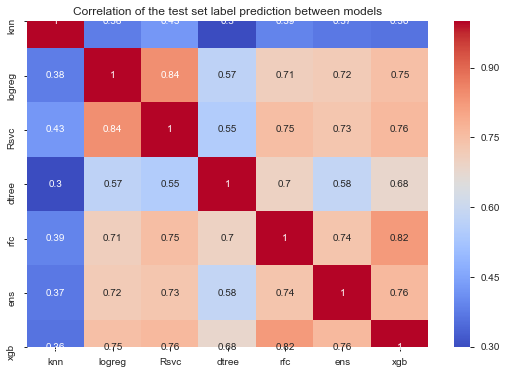

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [88]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [89]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Top Absolute Correlations
knn  dtree     0.298861
     xgb       0.364283
     ens       0.372043
     logreg    0.379676
     rfc       0.391074
dtype: float64


## Stacking Classifier

In [61]:
#Top 3 estimators in data sampling algorithms
estimators_sm= [('logreg',smgrid_log_reg.best_estimator_),
            ('rsvc',smgrid_svm.best_estimator_),('xgb',smgrid_xgb.best_estimator_)]

In [62]:
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators=estimators_sm
                                , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : np.logspace(-3,2,10),
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('logreg',
                                                       Pipeline(memory=None,
                                                                steps=[('smote',
                                                                        SMOTE(k_neighbors=3,
                                                                              n_jobs=None,
                                                                              random_state=None,
                                                                              sampling_strategy='auto')),
                                                                       ('lg',
                                                                        LogisticRegression(C=1.0,
                                                                                           class_weight=None,
                 

In [64]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.858715182573604
Best Mean Cross Validation Score is {'final_estimator__C': 27.825594022071257, 'stack_method': 'auto'}
Train score is 0.8839825086114301
Test score is 0.8640200619050161


In [106]:
estimators_sm= [('logreg',smgrid_log_reg.best_estimator_),
            ('rsvc',smgrid_svm.best_estimator_),('xgb',smgrid_xgb.best_estimator_)]

In [65]:
from sklearn.ensemble import StackingClassifier
sclf3 = StackingClassifier(estimators=estimators_sm
                                , final_estimator=RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))
sclf3_param = {
              'final_estimator__max_depth' : [9,10,11],
             }
sclf3_grid = GridSearchCV(sclf3, sclf3_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf3_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('logreg',
                                                       Pipeline(memory=None,
                                                                steps=[('smote',
                                                                        SMOTE(k_neighbors=3,
                                                                              n_jobs=None,
                                                                              random_state=None,
                                                                              sampling_strategy='auto')),
                                                                       ('lg',
                                                                        LogisticRegression(C=1.0,
                                                                                           class_weight=None,
                 

In [66]:
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_params_}')
print(f'Train score is {sclf3_grid.score(X_train,y_train)}')
print(f'Test score is {sclf3_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8530492099273632
Best Mean Cross Validation Score is {'final_estimator__max_depth': 10}
Train score is 0.8811395792436757
Test score is 0.8588825050930482
